In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower', origin=dataset_url, untar=True)
data_dir = "D:/Python/flower/"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))

#Load using keras.preprocessing
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

# Create the model
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
print("Saving Model:")
model.save('D:/Python/Trained_model_1/My_model_1') 

Found 13840 files belonging to 3 classes.
Using 11072 files for training.
Found 13840 files belonging to 3 classes.
Using 2768 files for validation.
0.0 1.0
Epoch 1/10
346/346 [==============================] - 385s 1s/step - loss: 0.1976 - accuracy: 0.9436 - val_loss: 0.1096 - val_accuracy: 0.9657
Epoch 2/10
346/346 [==============================] - 432s 1s/step - loss: 0.1015 - accuracy: 0.9692 - val_loss: 0.1079 - val_accuracy: 0.9668
Epoch 3/10
346/346 [==============================] - 453s 1s/step - loss: 0.0847 - accuracy: 0.9739 - val_loss: 0.0888 - val_accuracy: 0.9704
Epoch 4/10
346/346 [==============================] - 451s 1s/step - loss: 0.0711 - accuracy: 0.9772 - val_loss: 0.0859 - val_accuracy: 0.9700
Epoch 5/10
346/346 [==============================] - 402s 1s/step - loss: 0.0564 - accuracy: 0.9818 - val_loss: 0.1127 - val_accuracy: 0.9697
Epoch 6/10
346/346 [==============================] - 396s 1s/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.1220 - val_ac

This image most likely belongs to roses with a 100.00 percent confidence.
Actual Image :


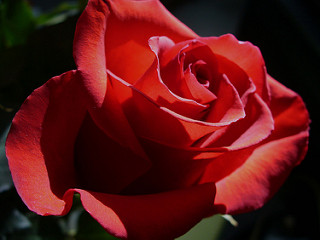

In [2]:
img = keras.preprocessing.image.load_img(
    'R1.jpg', target_size=(img_height, img_width)
)

# convert image to tensor or numpy
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

print("Actual Image :")
PIL.Image.open("R1.jpg")

This image most likely belongs to not_flower with a 100.00 percent confidence.
Actual Image :


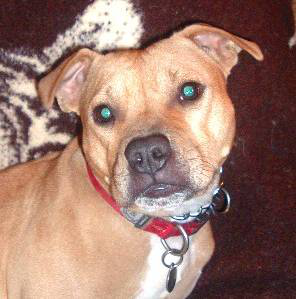

In [7]:
img = keras.preprocessing.image.load_img(
    '2.jpg', target_size=(img_height, img_width)
)

# convert image to tensor or numpy
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

print("Actual Image :")
PIL.Image.open("2.jpg")